In [56]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
num_task = 2
# job_dependency_mat = np.random.randint(2, size=(
#     num_task, num_task))
job_dependency_mat = np.ones((2,2))
job_dependency_mat[0][0]=0
# job_dependency_mat[0][1]=0
job_dependency_mat[1][1]=0
job_dependency_dag_orig = nx.DiGraph(job_dependency_mat)
job_dependency_mat

array([[0., 1.],
       [1., 0.]])

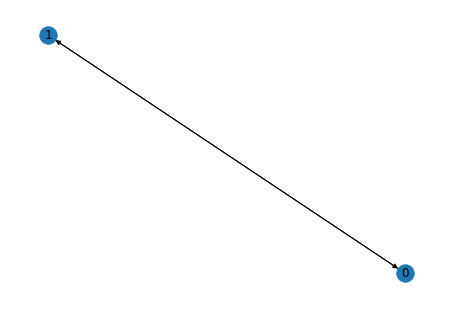

In [58]:
nx.draw(job_dependency_dag_orig,  with_labels = True)

In [59]:
for edge in job_dependency_dag_orig.edges():
    print(job_dependency_dag_orig.get_edge_data(*edge)['weight'])
    print(edge)
job_dependency_dag_orig.edges()

1.0
(0, 1)
1.0
(1, 0)


OutEdgeView([(0, 1), (1, 0)])

OutEdgeView([])

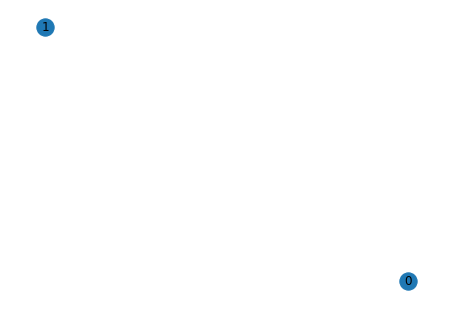

In [60]:
job_dependency_dag_orig.remove_edges_from([(0,1)])
job_dependency_dag_orig.remove_edges_from([(1,0)])

nx.draw(job_dependency_dag_orig,  with_labels = True)
for edge in job_dependency_dag_orig.edges():
    print(job_dependency_dag_orig.get_edge_data(*edge)['weight'])
    print(edge)
job_dependency_dag_orig.edges()

1.0
(0, 1)


OutEdgeView([(0, 1)])

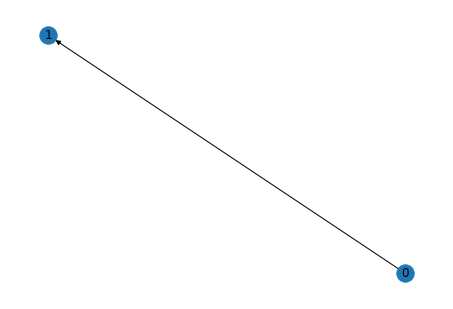

In [61]:
job_dependency_dag_orig.add_edge(0,1)
job_dependency_dag_orig[0][1]['weight'] = 1.0
nx.draw(job_dependency_dag_orig,  with_labels = True)
for edge in job_dependency_dag_orig.edges():
    print(job_dependency_dag_orig.get_edge_data(*edge)['weight'])
    print(edge)
job_dependency_dag_orig.edges()

(2, 0, {'weight': 1})
(3, 0, {'weight': 1})
(3, 1, {'weight': 1})
(3, 2, {'weight': 1})
(4, 0, {'weight': 1})
(4, 2, {'weight': 1})
(4, 3, {'weight': 1})
(5, 1, {'weight': 1})
(5, 2, {'weight': 1})
(5, 3, {'weight': 1})
(6, 1, {'weight': 1})
(6, 3, {'weight': 1})
(7, 0, {'weight': 1})
(7, 6, {'weight': 1})


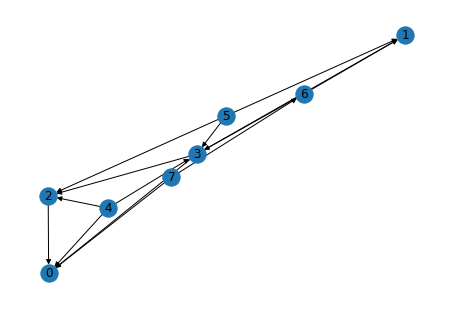

In [4]:
job_dependency_mat = np.tril(job_dependency_mat, k=-1)

job_dependency_dag = nx.DiGraph(job_dependency_mat)

job_dependency_dag.remove_edges_from(
    # Remove all edges with weight of 0 since we have no placeholder for "this edge doesn't exist"
    [edge for edge in job_dependency_dag.edges() if
     job_dependency_dag.get_edge_data(*edge)['weight'] == '0.0']
)
nx.relabel_nodes(job_dependency_dag, lambda idx: idx, copy=False)
nx.draw(job_dependency_dag,  with_labels = True)

for edge in list(job_dependency_dag.edges(data=True)):
    print(edge)


In [5]:
dag_met = np.zeros((num_task,num_task))
for edge in list(job_dependency_dag.edges(data=True)):
    dag_met[edge[0]][edge[1]] = 1
num_task +=2
dag_met

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0.]])

In [6]:
new_dag_met = np.zeros((num_task, num_task))
for x in range(len(dag_met)):
    for y in range(len(dag_met)):
        new_dag_met[x+1][y+1] = dag_met[x][y]
df = pd.DataFrame(new_dag_met)
df

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
row = []
col = []
for idx in range(len(df)):
    if not 1 in df[idx:idx+1].values:
        row.append(idx)
    if not 1 in df[idx].values:
        col.append(idx)
row, col

([0, 1, 2, 9], [0, 5, 6, 8, 9])

In [8]:
for row_i in row[1:-1]:
    new_dag_met[row_i][0] = 1
    
for col_i in col[1:-1]:
    new_dag_met[num_task-1][col_i] = 1
new_met_df = pd.DataFrame(new_dag_met)
new_met_df

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


(1, 0, {'weight': 1.0})
(2, 0, {'weight': 1.0})
(3, 1, {'weight': 1.0})
(4, 1, {'weight': 1.0})
(4, 2, {'weight': 1.0})
(4, 3, {'weight': 1.0})
(5, 1, {'weight': 1.0})
(5, 3, {'weight': 1.0})
(5, 4, {'weight': 1.0})
(6, 2, {'weight': 1.0})
(6, 3, {'weight': 1.0})
(6, 4, {'weight': 1.0})
(7, 2, {'weight': 1.0})
(7, 4, {'weight': 1.0})
(8, 1, {'weight': 1.0})
(8, 7, {'weight': 1.0})
(9, 5, {'weight': 1.0})
(9, 6, {'weight': 1.0})
(9, 8, {'weight': 1.0})


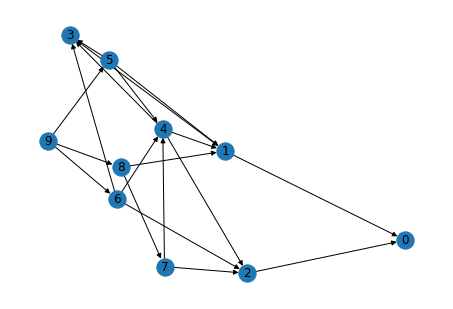

In [9]:
job_dependency_dag_new = nx.DiGraph(np.array(new_met_df.values.tolist()))
nx.draw(job_dependency_dag_new,  with_labels = True)
for edge in list(job_dependency_dag_new.edges(data=True)):
    print(edge)

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

num_task = 8
job_dependency_mat = np.random.randint(2, size=(
    num_task, num_task))

# job_dependency_dag_orig = nx.DiGraph(job_dependency_mat)

# job_dependency_dag_orig
# nx.draw(job_dependency_dag_orig,  with_labels = True)

job_dependency_mat = np.tril(job_dependency_mat, k=-1)

job_dependency_dag = nx.DiGraph(job_dependency_mat)

job_dependency_dag.remove_edges_from(
    # Remove all edges with weight of 0 since we have no placeholder for "this edge doesn't exist"
    [edge for edge in job_dependency_dag.edges() if
     job_dependency_dag.get_edge_data(*edge)['weight'] == '0.0']
)
nx.relabel_nodes(job_dependency_dag, lambda idx: idx, copy=False)
# nx.draw(job_dependency_dag,  with_labels = True)

# for edge in list(job_dependency_dag.edges(data=True)):
#     print(edge)
# print("\n")
    
dag_met = np.zeros((num_task,num_task))
for edge in list(job_dependency_dag.edges(data=True)):
    dag_met[edge[0]][edge[1]] = 1
num_task +=2
# dag_met
new_dag_met = np.zeros((num_task, num_task))
for x in range(len(dag_met)):
    for y in range(len(dag_met)):
        new_dag_met[x+1][y+1] = dag_met[x][y]
df = pd.DataFrame(new_dag_met)
df
row = []
col = []
for idx in range(len(df)):
    if not 1 in df[idx:idx+1].values:
        row.append(idx)
    if not 1 in df[idx].values:
        col.append(idx)
row, col

for row_i in row[1:-1]:
    new_dag_met[row_i][0] = 1
    
for col_i in col[1:-1]:
    new_dag_met[num_task-1][col_i] = 1
new_met_df = pd.DataFrame(new_dag_met)
new_met_df
job_dependency_dag_new = nx.DiGraph(np.array(new_met_df.values.tolist()))
nx.relabel_nodes(job_dependency_dag_new, lambda idx: idx, copy=False)

# nx.draw(job_dependency_dag_new,  with_labels = True)
# for edge in list(job_dependency_dag_new.edges(data=True)):
#     print(edge)
    
TEST = nx.to_numpy_array(job_dependency_dag_new)


(1, 0, {'weight': 1})
(2, 0, {'weight': 1})
(2, 1, {'weight': 1})
(3, 0, {'weight': 1})
(3, 2, {'weight': 1})
(4, 3, {'weight': 1})
(5, 0, {'weight': 1})
(5, 1, {'weight': 1})
(5, 3, {'weight': 1})
(5, 4, {'weight': 1})
(6, 0, {'weight': 1})
(6, 2, {'weight': 1})
(6, 4, {'weight': 1})
(7, 4, {'weight': 1})
(7, 5, {'weight': 1})


(1, 0, {'weight': 1.0})
(2, 1, {'weight': 1.0})
(3, 1, {'weight': 1.0})
(3, 2, {'weight': 1.0})
(4, 1, {'weight': 1.0})
(4, 3, {'weight': 1.0})
(5, 4, {'weight': 1.0})
(6, 1, {'weight': 1.0})
(6, 2, {'weight': 1.0})
(6, 4, {'weight': 1.0})
(6, 5, {'weight': 1.0})
(7, 1, {'weight': 1.0})
(7, 3, {'weight': 1.0})
(7, 5, {'weight': 1.0})
(8, 5, {'weight': 1.0})
(8, 6, {'weight': 1.0})
(9, 7, {'weight': 1.0})
(9, 8, {'weight': 1.0})


In [5]:
TEST

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 1., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.]])

In [67]:
a={}

a[1]=2
a.values()

dict_values([2])

In [69]:
min(np.inf,0)

0